In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

[Data for example is from Kaggle](kaggle.com/datasets/michellevp/dataset-phishing-domain-detection-cybersecurity)

In [2]:
df = pd.read_csv('replace with your file')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB


In [4]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,...,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,...,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,...,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,...,1,2,1,299,1,1,0,0,0,0


In [5]:
# Define the features and target variable
X = df.drop('phishing', axis=1)  # Replace 'target_column_name' with the actual name
y = df['phishing']

In [6]:
# First split: 80% training, 20% remaining (validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Second split: 50% validation, 50% testing from the remaining 20%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
# Check the sizes of each set
len(X_train), len(X_val), len(X_test)

(103758, 12970, 12970)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize and train the model
model = LogisticRegression(C=1, solver='lbfgs', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=2000, random_state=42)

In [12]:
# Predict on the validation set
y_val_pred = model.predict(X_val_scaled)

In [13]:
# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

In [14]:
# Evaluate on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)

In [15]:
# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [16]:
# Print the results
print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Classification Report:\n", val_report)
print("Validation Confusion Matrix:\n", val_conf_matrix)

Validation Accuracy: 0.93
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7768
           1       0.90      0.92      0.91      5202

    accuracy                           0.93     12970
   macro avg       0.92      0.92      0.92     12970
weighted avg       0.93      0.93      0.93     12970

Validation Confusion Matrix:
 [[7245  523]
 [ 442 4760]]


In [17]:
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:\n", test_report)
print("Test Confusion Matrix:\n", test_conf_matrix)

Test Accuracy: 0.92
Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7623
           1       0.90      0.92      0.91      5347

    accuracy                           0.92     12970
   macro avg       0.92      0.92      0.92     12970
weighted avg       0.92      0.92      0.92     12970

Test Confusion Matrix:
 [[7094  529]
 [ 451 4896]]


In [18]:
import numpy as np

# Retrieve the feature names
feature_names = X_train.columns

# Retrieve the coefficients from the model
coefficients = model.coef_[0]

# Create a DataFrame to hold the feature importance information
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute value of coefficients to interpret importance
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features
feature_importance.head(10)


,Feature,Coefficient,Absolute Coefficient
93,params_length,2.076469,2.076469
18,length_url,1.833763,1.833763
95,qty_params,-1.492762,1.492762
6,qty_at_url,1.441855,1.441855
100,time_domain_activation,-1.361090,1.361090
45,qty_equal_directory,1.209900,1.209900
57,directory_length,1.042548,1.042548
68,qty_tilde_file,-1.015693,1.015693
40,qty_dot_directory,1.011678,1.011678
94,tld_present_params,0.850796,0.850796


In [20]:
# Display the bottom features
feature_importance.tail(10)

,Feature,Coefficient,Absolute Coefficient
32,qty_asterisk_domain,0.0,0.0
29,qty_tilde_domain,0.0,0.0
33,qty_hashtag_domain,0.0,0.0
24,qty_equal_domain,0.0,0.0
35,qty_percent_domain,0.0,0.0
26,qty_and_domain,0.0,0.0
23,qty_questionmark_domain,0.0,0.0
22,qty_slash_domain,0.0,0.0
28,qty_space_domain,0.0,0.0
27,qty_exclamation_domain,0.0,0.0


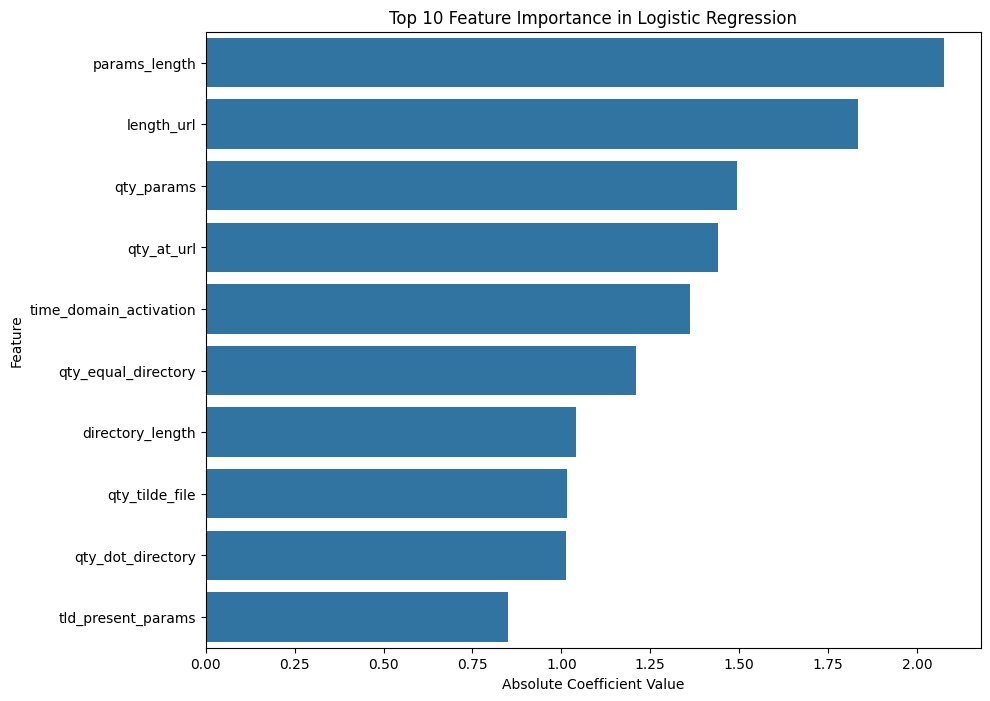

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


/var/folders/f1/9k9zpk953js2xl1czgsvgjjm0000gp/T/ipykernel_21674/1537714030.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolors='k', marker='x', cmap=ListedColormap(('blue', 'red')))


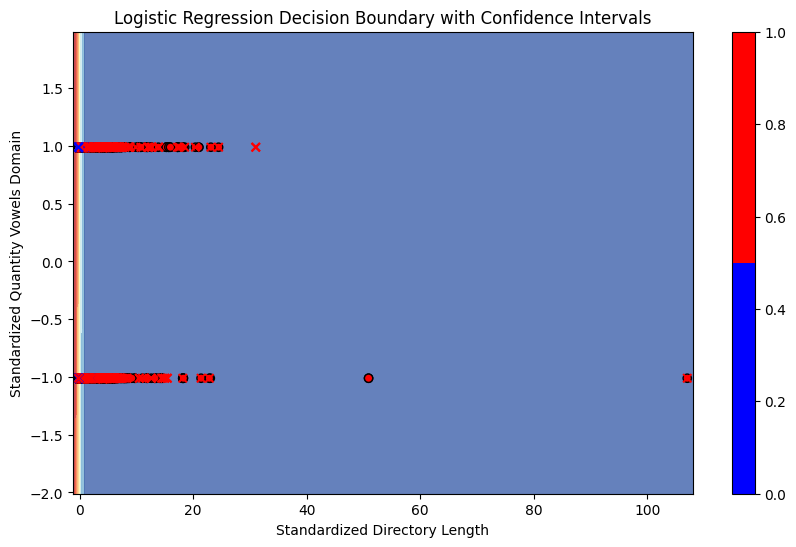

In [22]:
# Select two features for visualization
X_vis = X[['params_length', 'tls_ssl_certificate']].values
y_vis = y.values

# Standardize the features
scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

# Train-test split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model_vis = LogisticRegression()
model_vis.fit(X_train_vis, y_train_vis)

# Define the decision boundary grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the probability for each point in the grid
Z = model_vis.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and confidence intervals
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Scatter plot of the training and test data
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, edgecolors='k', marker='o', cmap=ListedColormap(('blue', 'red')))
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolors='k', marker='x', cmap=ListedColormap(('blue', 'red')))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression Decision Boundary with Confidence Intervals')
plt.xlabel('Standardized Directory Length')
plt.ylabel('Standardized Quantity Vowels Domain')
plt.colorbar()
plt.show()

In [23]:
def predict_single_entry(index, model, X_test_scaled, y_test):
    """
    Predict the label for a single entry from the test set.

    Parameters:
    - index: The index of the entry in the test set.
    - model: The trained logistic regression model.
    - X_test_scaled: The scaled test set features.
    - y_test: The test set labels.

    Returns:
    - None. Prints out the prediction details.
    """
    
    # Step 1: Extract the single entry (scaled features) and the true label
    single_entry_scaled = X_test_scaled[index:index+1]  # Extract the entry (already scaled)
    single_label = y_test.iloc[index]                   # Extract the corresponding label

    # Step 2: Make the prediction
    single_prediction = model.predict(single_entry_scaled)
    single_prediction_proba = model.predict_proba(single_entry_scaled)

    # Step 3: Display the results
    print(f"Test Entry at Index {index} (Scaled Features):\n", single_entry_scaled)
    print(f"Actual Label: {single_label}")
    print(f"Predicted Label: {single_prediction[0]}")
    print(f"Prediction Probabilities (Probability of Class 0 and Class 1):", single_prediction_proba[0])

# Example usage
predict_single_entry(0, model, X_test_scaled, y_test)  # Predicts the first entry in the test set
predict_single_entry(10, model, X_test_scaled, y_test) # Predicts the 11th entry in the test set
predict_single_entry(25, model, X_test_scaled, y_test) # Predicts the 26th entry in the test set


Test Entry at Index 0 (Scaled Features):
 [[-0.1654897  -0.30722369 -0.18688861  0.26270293 -0.09193443 -0.23467967
  -0.09020384 -0.16572616 -0.03356408 -0.01383338 -0.04339784 -0.03322978
  -0.02632453 -0.01552704 -0.00892116 -0.02003729 -0.06355879 -0.19933905
  -0.14440608  0.20882222 -0.27877486 -0.02010553  0.          0.
   0.         -0.0031045   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.37663191  0.97524586 -0.05145631 -0.06510957  0.23173298  0.22052497
   0.56407859  0.4471084   0.92446901  0.87027123  0.83437224  0.84591792
   0.90916413  0.91294189  0.89819739  0.91629948  0.89646151  0.75251238
   0.92446901  0.90507094  0.22972318 -0.22292744  0.34216348  0.4730884
   0.70463167  0.92446901  0.92446901  0.91251795  0.92230416  0.91482547
   0.91786143  0.91761209  0.9215028   0.9176045   0.90197579  0.79989487
   0.92446901  0.92446901  0.250742   -0.22507649 -0.20956933 -0.20408153
  -0.22764668 -0.2197

# Hyperparamter Tuning

## This next code block is for hyperparameter tuning. It not necessary to run this step for this model as it's already been run but I'm leaving the code in case you want to reference it.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a refined hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],  # Using a more stable solver
}

# Initialize the logistic regression model with increased iterations
model = LogisticRegression(max_iter=2000, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training set
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'solver': 'lbfgs'}


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.pkl')

# To load the model back into memory
loaded_model = joblib.load('logistic_regression_model.pkl')